In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip
from io import StringIO

In [48]:
cls = pd.read_csv('class.tsv', sep='\t', header=None)
labels = cls[0].values

# Read and parse the map file
with open('columns.tsv', 'r') as f:
    lines = [line for line in f if not line.startswith('#')]

temp = StringIO(''.join(lines))
gene_map = pd.read_csv(temp, sep='\t')

# Read the filtered data
data = pd.read_csv('filtered.tsv', sep='\t', index_col=0)

# Clean column names
data.columns = data.columns.astype(str).str.strip()

# Find gene IDs for XBP1 and GATA3
xbp1 = 4404
gata3 = gene_map[gene_map['GeneSymbol'] == 'GATA3']['ID'].values[0]

# Extract expression data for XBP1 and GATA3
xbp1_exp = data[str(xbp1)].values
gata3_exp = data[str(gata3)].values

print(f"GATA3 : {gata3} , XBP1 : {xbp1}")

# Assign colors based on label
colors = ['black' if lbl == 0 else 'red' for lbl in labels]

GATA3 : 4359 , XBP1 : 4404


In [59]:

def perform_pca(X):
    # Preprocessing: mean centering
    X_centered = X - np.mean(X, axis=0)
    
    # Covariance matrix calculation
    cov_matrix = np.cov(X_centered, rowvar=False)
    
    # Eigen decomposition
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
    
    # Sort eigenvalues and eigenvectors in descending order
    sorted_idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    
    return eigenvectors, eigenvalues, X_centered


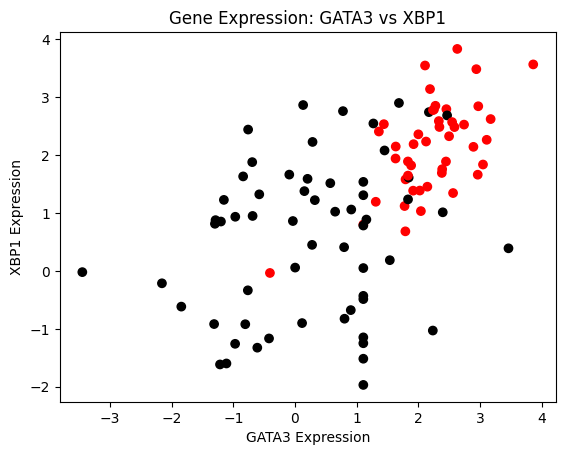

In [60]:
plt.scatter(gata3_exp, xbp1_exp, c=colors)
plt.xlabel('GATA3 Expression')
plt.ylabel('XBP1 Expression')
plt.title('Gene Expression: GATA3 vs XBP1')
plt.show()

In [53]:
x = np.column_stack((gata3_exp, xbp1_exp))

eigenvectors, eigenvalues, X_centered = perform_pca(x)

pc1 = eigenvectors[:, 0]
pc2 = eigenvectors[:, 1]
pc1_proj = np.dot(X_centered, pc1)
pc2_proj = np.dot(X_centered, pc2)
if np.mean(pc1_proj[labels == 1]) < np.mean(pc1_proj[labels == 0]):
    pc1 = -pc1
    pc1_proj = -pc1_proj

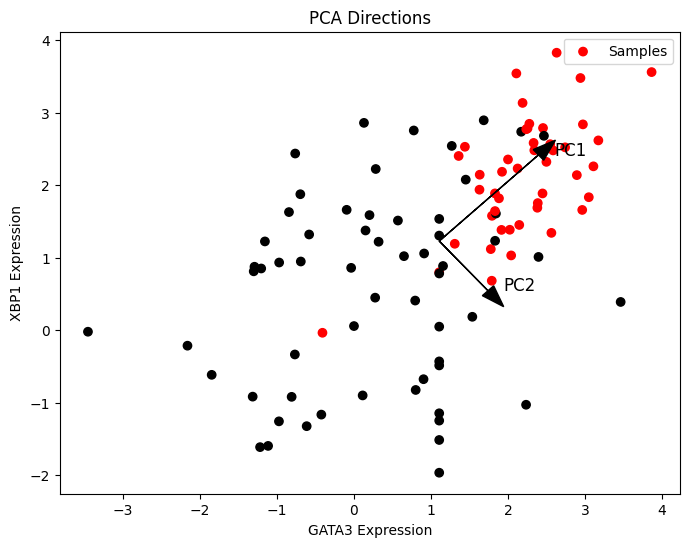

In [55]:
plt.figure(figsize=(8, 6))
plt.scatter(gata3_exp, xbp1_exp, c=colors, label='Samples')
mean_gata3 = np.mean(gata3_exp)
mean_xbp1 = np.mean(xbp1_exp)
scale1 = np.sqrt(eigenvalues[0])
scale2 = np.sqrt(eigenvalues[1])

plt.arrow(mean_gata3, mean_xbp1, pc1[0] * scale1, pc1[1] * scale1, head_width=0.2, head_length=0.3, fc='black', ec='black')

plt.arrow(mean_gata3, mean_xbp1, pc2[0] * scale2, pc2[1] * scale2, head_width=0.2, head_length=0.3, fc='black', ec='black')

plt.text(mean_gata3 + pc1[0] * scale1 + 0.2, mean_xbp1 + pc1[1] * scale1, 'PC1', fontsize=12)
plt.text(mean_gata3 + pc2[0] * scale2 + 0.2, mean_xbp1 + pc2[1] * scale2, 'PC2', fontsize=12)

plt.xlabel('GATA3 Expression')
plt.ylabel('XBP1 Expression')
plt.title('PCA Directions')
plt.legend()

plt.show()

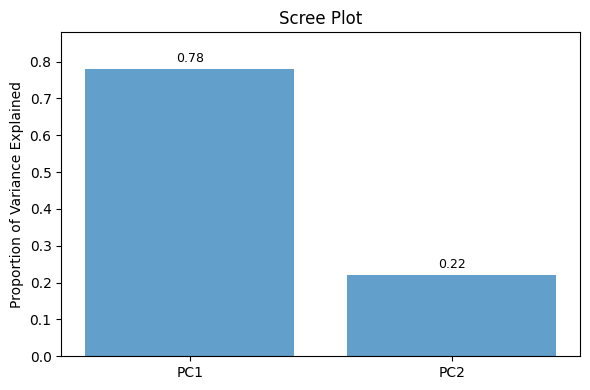

In [58]:
variance_ratio = eigenvalues / np.sum(eigenvalues)

plt.figure(figsize=(6, 4))
pcas = [f"PC{i+1}" for i in range(len(variance_ratio))]
plt.bar(pcas, variance_ratio, alpha=0.7)

for i, v in enumerate(variance_ratio):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.ylim(0, max(variance_ratio) + 0.1)
plt.tight_layout()

plt.show()


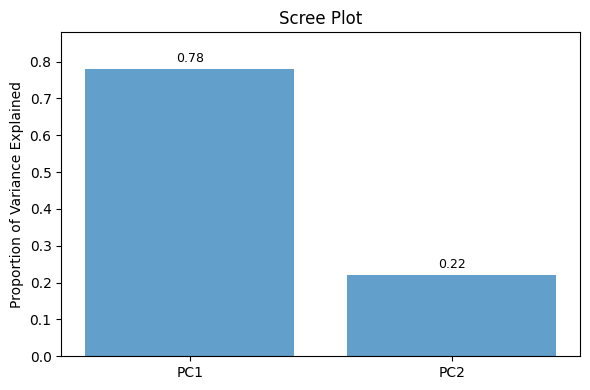

In [57]:
# Variance explained by each principal component (Proportion of Variance Explained)
variance_ratio = eigenvalues / np.sum(eigenvalues)

# Create a bar plot for the variance explained by each principal component
plt.figure(figsize=(6, 4))
pcas = [f"PC{i+1}" for i in range(len(variance_ratio))]  # PC1, PC2, etc.
plt.bar(pcas, variance_ratio, alpha=0.7)

# Annotate each bar with its corresponding value
for i, v in enumerate(variance_ratio):
    plt.text(i, v + 0.01, f"{v:.2f}", ha='center', va='bottom', fontsize=9)

# Add labels and title
plt.ylabel('Proportion of Variance Explained')
plt.title('Scree Plot')
plt.ylim(0, max(variance_ratio) + 0.1)  # Set y-limit for better visibility
plt.tight_layout()

# Display the plot
plt.show()
